In [315]:
# Importing Libraries
import os
import numpy as np
import pandas as pd
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
# Setting up directory
os.chdir('C:\\Users\\v8307436\\Downloads\\HousePriceDataset')

In [212]:
# Importing Train and Test Dataset
dataset = pd.read_excel('train.xlsx',verbose=1)

Reading sheet 0


In [213]:
# Data split into inputs and outputs
X = dataset.iloc[:,0:80]
y = dataset.iloc[:,-1]

In [214]:
# Printing the Count of Categorical and Numerical Features
numerical_feats = X.dtypes[X.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = X.dtypes[X.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  37
Number of Categorical features:  43


In [215]:
# Extracting the Categorical Features 
print(X[categorical_feats].columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [216]:
# One Hot Encoding Categorical Features into Numerical Features
X_copy = pd.get_dummies(X, columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'], prefix = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])

In [217]:
# Imputing Nan values in the train and test set
X_copy = X_copy.fillna(X_copy.mean())

In [218]:
#####################Building Random Forest Model for Feature Selection#########################################################
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1,max_depth=10)
model.fit(X_copy,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

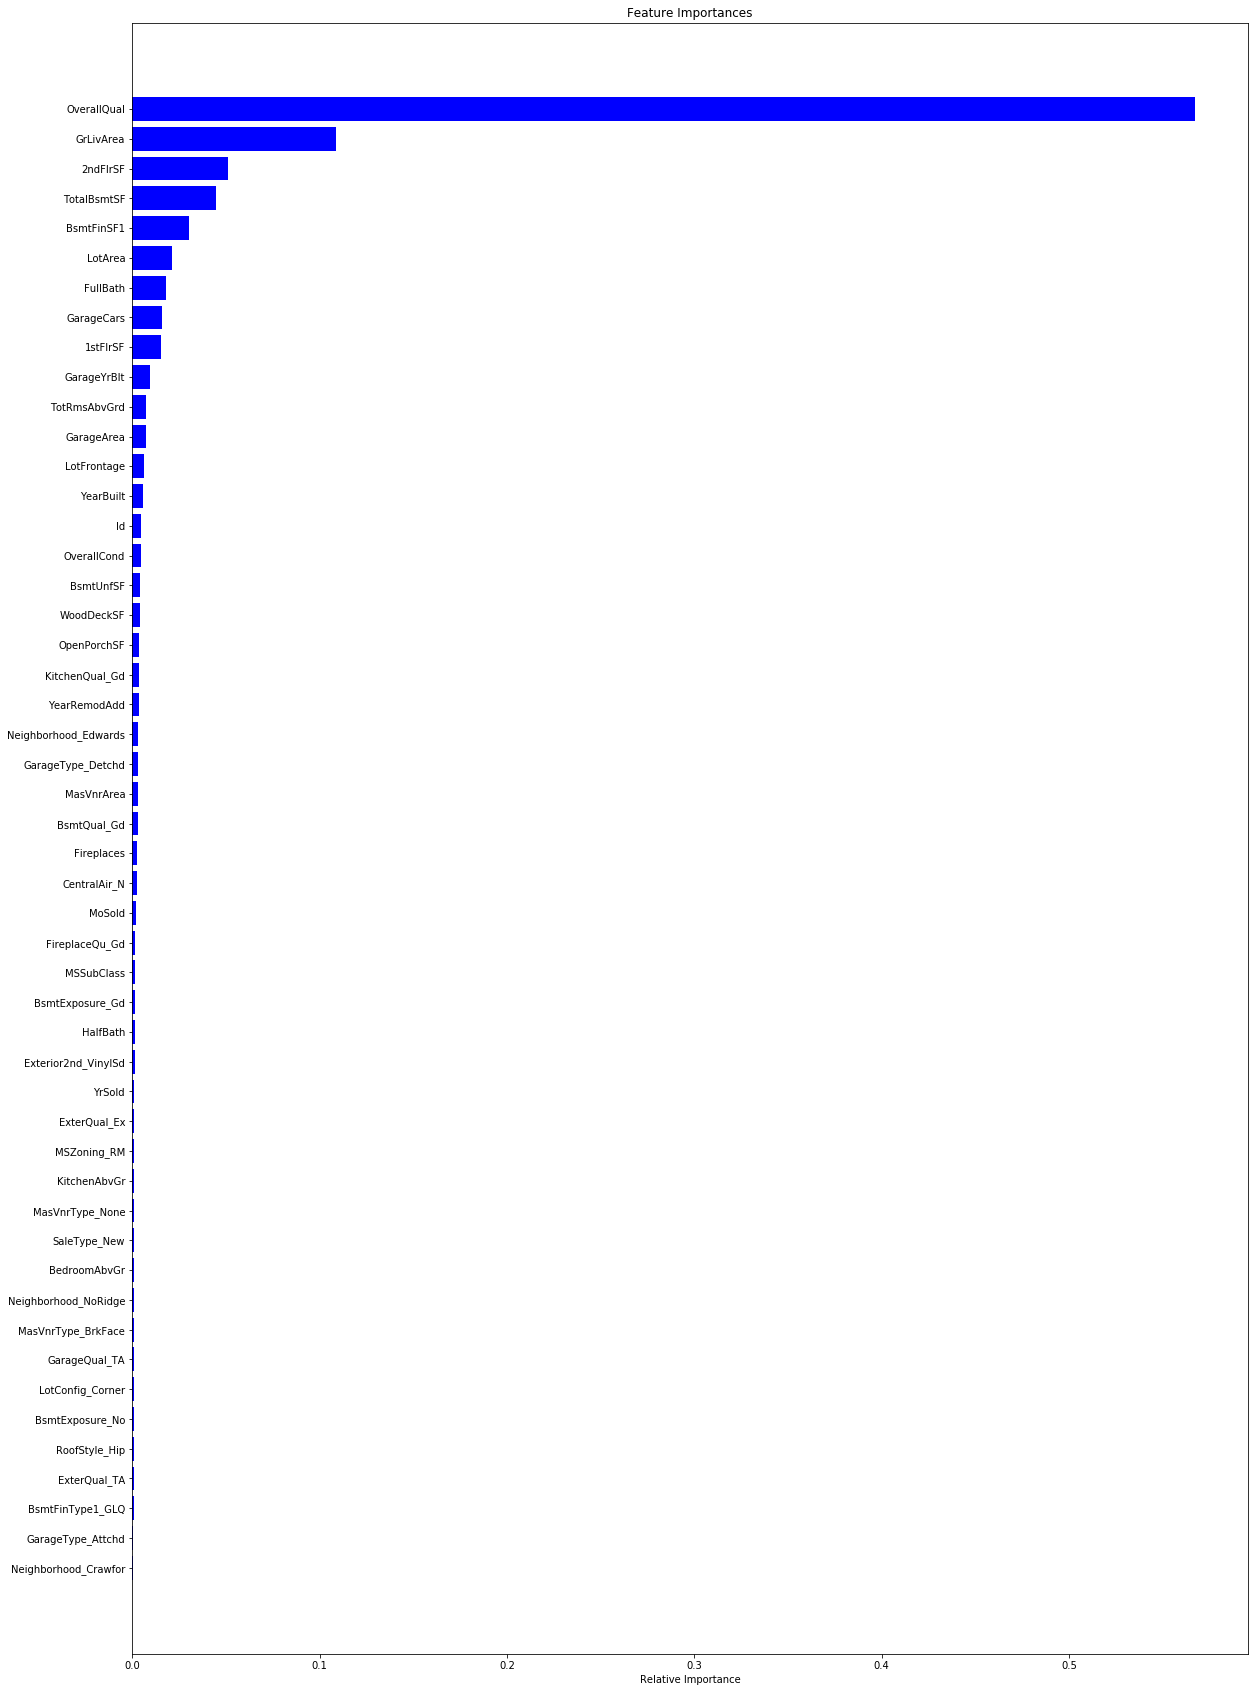

In [220]:
#####################Getting the Feature Importance##############################################################################
import numpy as np
features = X_copy.columns
importances = model.feature_importances_
plt.figure(figsize=(20,30))
indices = np.argsort(importances)[-50:]  # top 100 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [221]:
features = [features[i] for i in indices]

In [222]:
len(features)

50

In [223]:
column = X_copy.columns

In [ ]:
for i in column:
    if(i in features):
        print('yes')
    else:
        del X_copy[i]

In [ ]:
X_copy = X_copy.values
y_copy = y.values

In [229]:
# Splitting the dataset into the Training set, Test set And Validation Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [230]:
# Feature Scaling or Standardisation or Normalization
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.fit_transform(X_val)

In [231]:
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.fit_transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.fit_transform(y_test.reshape(-1, 1)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted

In [232]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [233]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [234]:
#Predicting the Validation set results
y_predval = regressor.predict(X_val)

In [235]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(X_val, y_val))

0.25197494052215685
0.14172620497481278
0.37646541006420864
Variance score: 0.86


In [236]:
# Calculating R^2 of the true and predicted values
from sklearn.metrics import r2_score
RR = r2_score(y_val, y_predval)
RR

0.8582737950251872

In [117]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [0,1,5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, refit=True, verbose=1, scoring = 'neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.0min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [3, 4, 6, 10], 'n_estimators': [70, 100], 'random_state': [0, 1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [118]:
print(grid_rf.best_params_)

{'min_samples_split': 3, 'n_estimators': 100, 'random_state': 5}


In [237]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(min_samples_split = 3, n_estimators = 100, random_state = 5)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [238]:
pred_rf = regressor.predict(X_val)

In [239]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, pred_rf))

# Print result of MSE
print(metrics.mean_squared_error(y_val, pred_rf))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, pred_rf)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(X_val, y_val))

0.23607955779981957
0.12199167220096684
0.3492730625183781
Variance score: 0.88


In [240]:
from sklearn.metrics import r2_score
RR = r2_score(y_val, pred_rf)
RR

0.8780083277990332

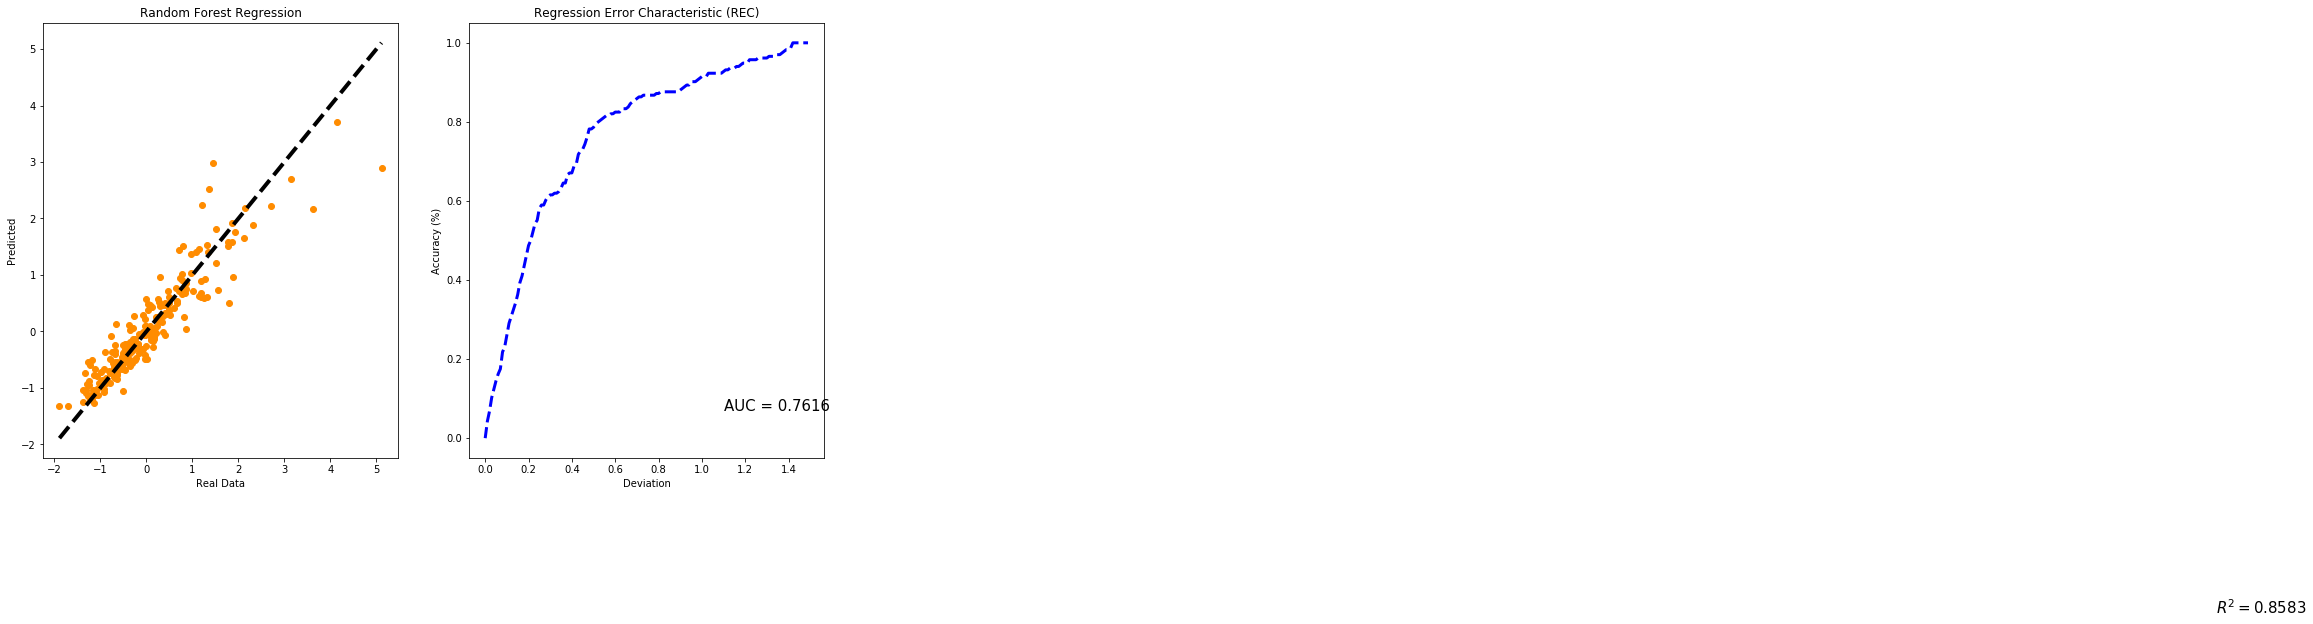

In [241]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.title("Random Forest Regression")
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()


In [242]:
###############################################Testing Set##############################################################
# Fitting Training Set
regressor = RandomForestRegressor(min_samples_split= 3, n_estimators= 100, random_state= 5)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [243]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [244]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(X_test, y_test))


0.22623641866111446
0.16989159263403647
0.4121790783555571
Variance score: 0.83


In [245]:
from sklearn.metrics import r2_score
RR2 = r2_score(y_test, y_pred)
RR2

0.8301084073659635

In [246]:
####################### Elastic Net ####################################
from sklearn.linear_model import ElasticNet
eNet = ElasticNet()
eNet.fit(X_train, y_train)
y_pred1 = eNet.predict(X_val)


In [247]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_pred1))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_pred1))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_pred1)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % eNet.score(X_val, y_val))

0.589109686494983
0.6554541854293127
0.8096012508817614
Variance score: 0.34


In [248]:
from sklearn.metrics import r2_score
RR2 = r2_score(y_val, y_pred1)
RR2

0.34454581457068734

In [ ]:
# Use grid search to tune the parameters:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

parametersGrid = {"max_iter": [1, 5, 10,20,30,40,50,60,70,80,90,100],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

eNet = ElasticNet()
grid = GridSearchCV(eNet, parametersGrid, scoring='r2', cv=10)
grid.fit(X_train, y_train)
Y_pred2 = grid.predict(X_val)

In [249]:
from sklearn.linear_model import ElasticNet
eNet = ElasticNet(alpha = 0.1, l1_ratio = 0.1, max_iter = 40)
eNet.fit(X_train, y_train)
y_predval = eNet.predict(X_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [250]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % eNet.score(X_val, y_val))

0.22548770431081694
0.11071791062488018
0.33274300988131994
Variance score: 0.89


In [251]:
from sklearn.metrics import r2_score
RR3 = r2_score(y_val, y_predval)
RR3

0.8892820893751199

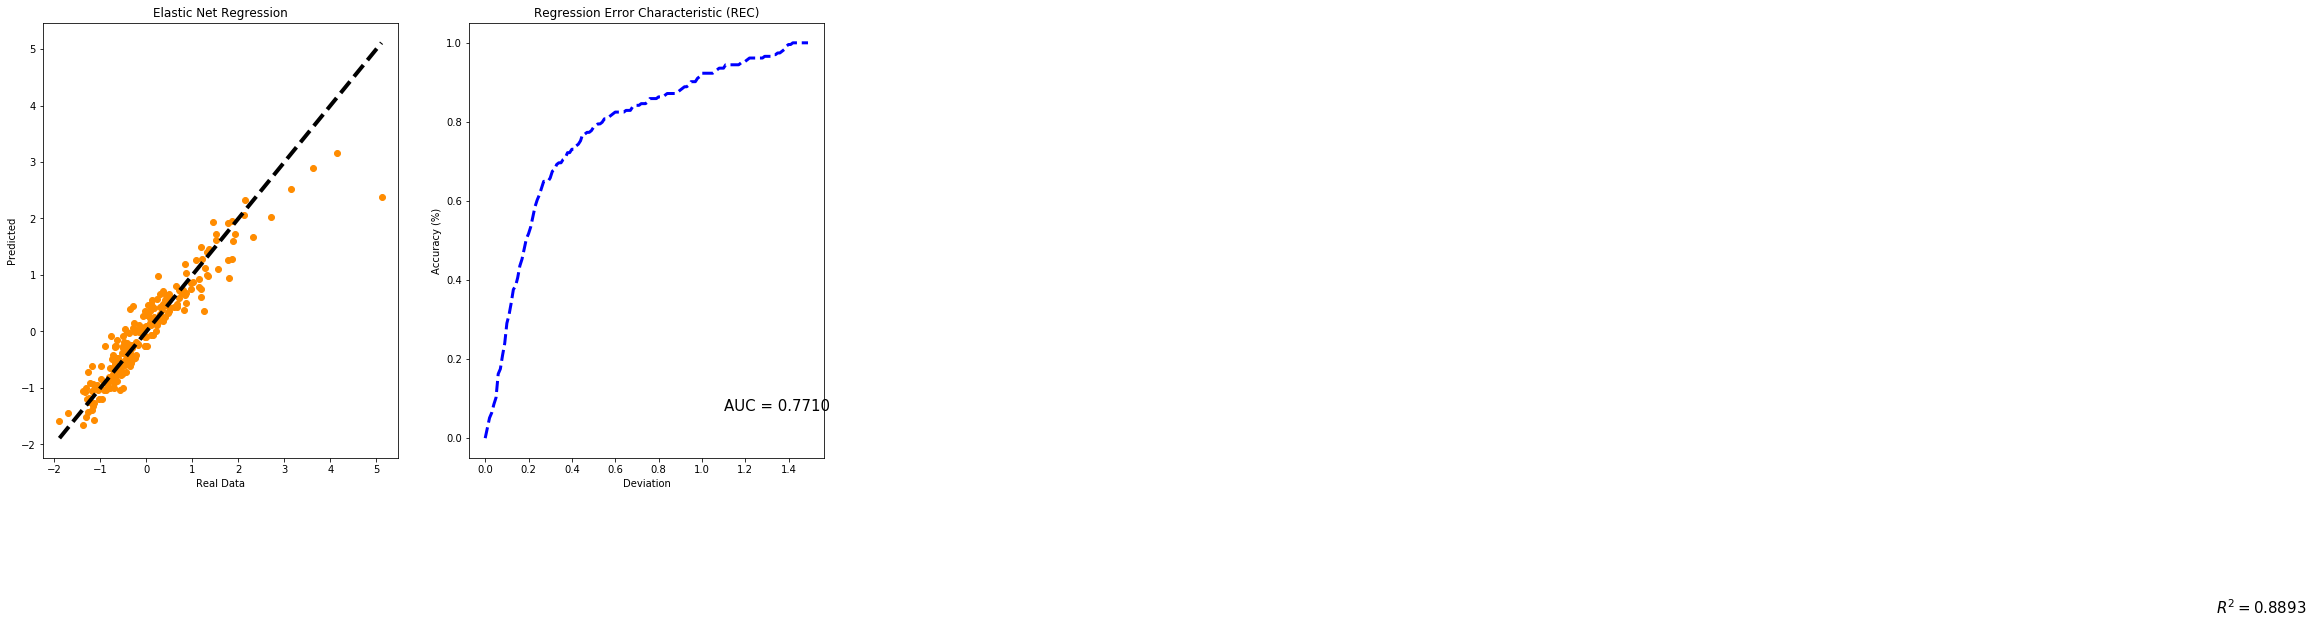

In [252]:
# Visualising the Elastic Net Regression Results
# Loading Packages
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.title("Elastic Net Regression")
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [253]:
###############################################Testing Set##############################################################
# Fitting Training Set
eNet_test = ElasticNet(alpha=0.1,l1_ratio=0.1,max_iter=40)
eNet_test.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=40, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [254]:
y_pred_eNet = eNet_test.predict(X_test)

In [255]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred_eNet))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred_eNet))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_eNet)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % eNet_test.score(X_test, y_test))

0.2608067243436504
0.3137327774213938
0.560118538723183
Variance score: 0.69


In [256]:
from sklearn.metrics import r2_score
RR4 = r2_score(y_test, y_pred_eNet)
RR4

0.6862672225786062

In [ ]:
#####################################DECISION TREE REGRESSION###################################################################

In [265]:
##########################Building and fitting train set on Decision Tree######################################################
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()


regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [266]:
#Predicting the Validation set results
y_predval_dtr = regressor.predict(X_val)

In [267]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval_dtr))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval_dtr))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval_dtr)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(X_val, y_val))


0.36228986438371075
0.30753058803392025
0.5545544049359993
Variance score: 0.69


In [268]:
# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval_dtr)
RR

0.6924694119660797

In [ ]:
# GRID SEARCH
param_grid = {"criterion": ["mse"],
                  "max_depth": [2, 5],
                  "max_features": [0.1, 0.2, 0.3],
                  "max_leaf_nodes":[2, 3, 4, 5, 10, 20],
                  "min_impurity_decrease": [0.0, 0.1, 0.2],
                  "min_impurity_split": [None],
                  "min_samples_leaf": [1,2,3,4,5],
                  "min_samples_split": [3, 4, 5, 10, 20, 25, 30],
                  "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
                  "presort": [False],
                  "splitter": ["best"]}  

In [ ]:
regressor = DecisionTreeRegressor()

grid = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=10, verbose=1)
grid.fit(X_train, y_train)

In [269]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='mse',max_depth=5,max_features=0.3,max_leaf_nodes=20,min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=4,min_samples_split=3,min_weight_fraction_leaf=0.0,presort=False,splitter='best')

# Fitting Training Set
regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=0.3,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [270]:
y_predval = regressor.predict(X_val)

In [271]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(X_val, y_val))


0.3833687269784422
0.26587443557705615
0.5156301344733996
Variance score: 0.73


In [272]:
# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)
RR

0.7341255644229439

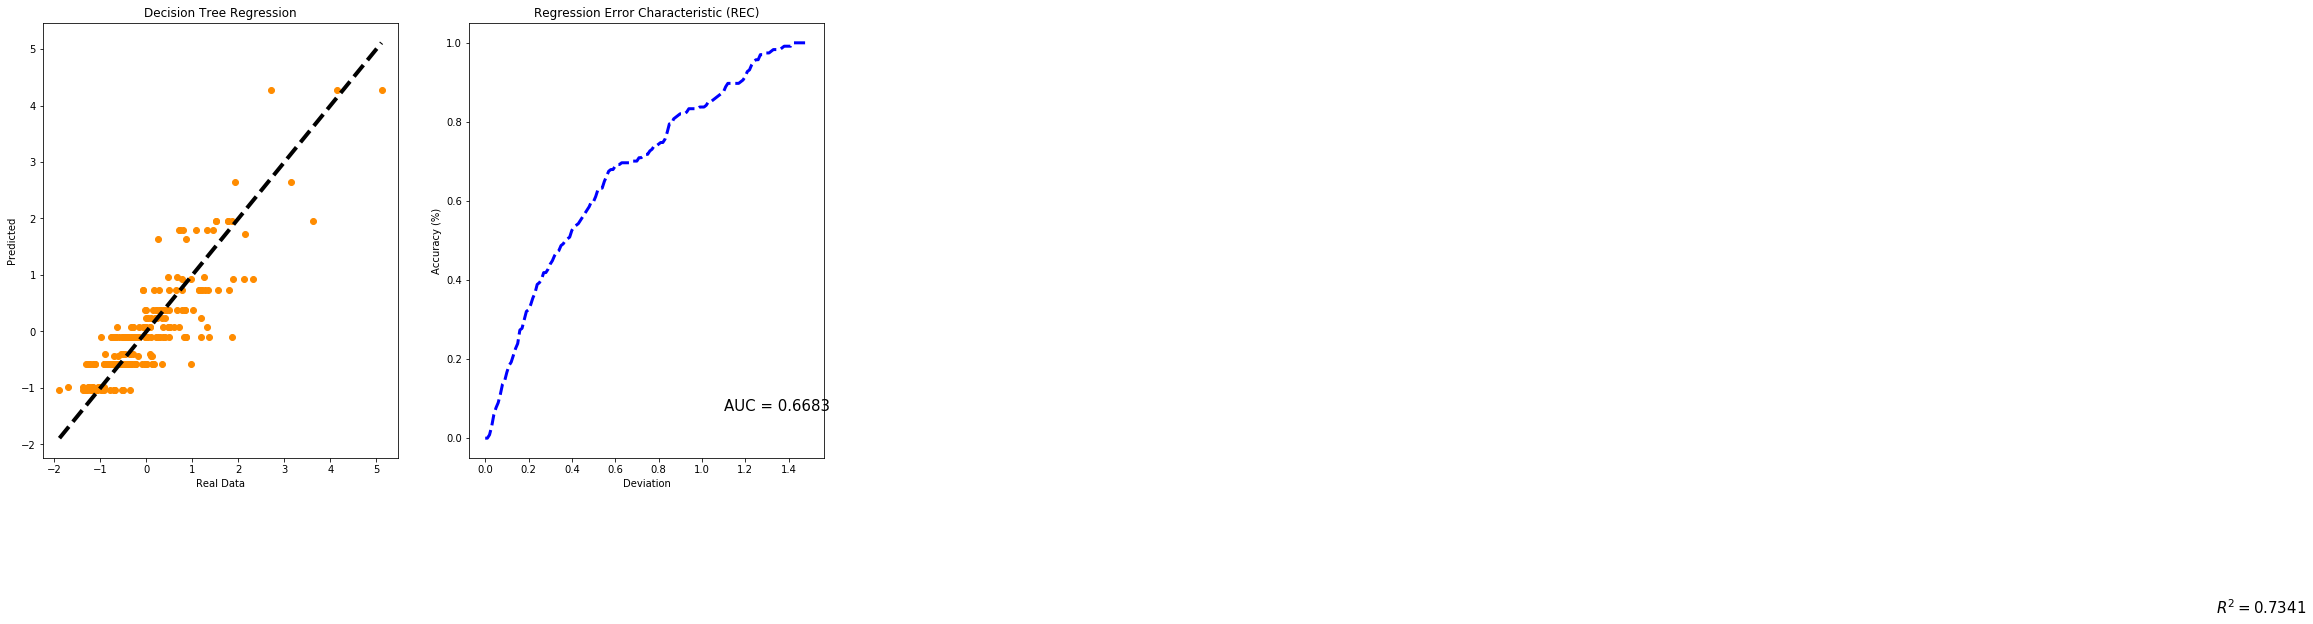

In [274]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.title("Decision Tree Regression")
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [277]:
###############################################Testing Set##############################################################
regressor = DecisionTreeRegressor(criterion='mse',max_depth=5,max_features=0.3,max_leaf_nodes=20,min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=4,min_samples_split=3,min_weight_fraction_leaf=0.0,presort=False,splitter='best')

# Fitting Training Set
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred_test = regressor.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred_test))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred_test))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(X_test, y_test))


0.36506233910600633
0.3558728354381724
0.5965507819441463
Variance score: 0.64


In [278]:
# Calculating R^2 of the true and predicted values
RR = r2_score(y_test, y_pred_test)
RR

0.6441271645618276

In [279]:
#################################Gradient Boosting##############################################################################
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [280]:
#Predicting the Validation set results
y_predval_gbr = gbr.predict(X_val)

In [281]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval_gbr))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval_gbr))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval_gbr)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % gbr.score(X_val, y_val))

0.21189821555195312
0.09335847601633158
0.305546192933788
Variance score: 0.91


In [282]:
# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval_gbr)
RR

0.9066415239836684

In [58]:
###############################GRID SEARCH ON GRADIENT BOOSTING REGRESSOR#######################################################
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

estimator = GradientBoostingRegressor()

param_grid = {"criterion":["friedman_mse"],
              "min_samples_split": [0.1, 0.5, 2],
              "max_depth":[3,5,8],
              "max_features":["log2","sqrt"],
              "n_estimators":[10,100],
              "random_state":[0,1,42],
              "min_samples_leaf":[0.1, 0.5, 1,2],
              "learning_rate": [0.01, 0.05, 0.1],
               "subsample":[0.5, 0.75, 1.0],
              "loss":["ls"],
              "alpha":[0.1,0.5],
              "verbose":[1]
             }

In [ ]:
gbr = GridSearchCV(estimator,param_grid,cv=10,verbose=1)
gbr.fit(X_train, y_train)

In [283]:
#################################Gradient Boosting##############################################################################
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [284]:
#############################Prediction using Validation Set####################################################################
y_predval = gbr.predict(X_val)

In [285]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % gbr.score(X_val, y_val))

0.21187354205219225
0.09427262984710916
0.3070384826810951
Variance score: 0.91


In [286]:
# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)
RR

0.9057273701528908

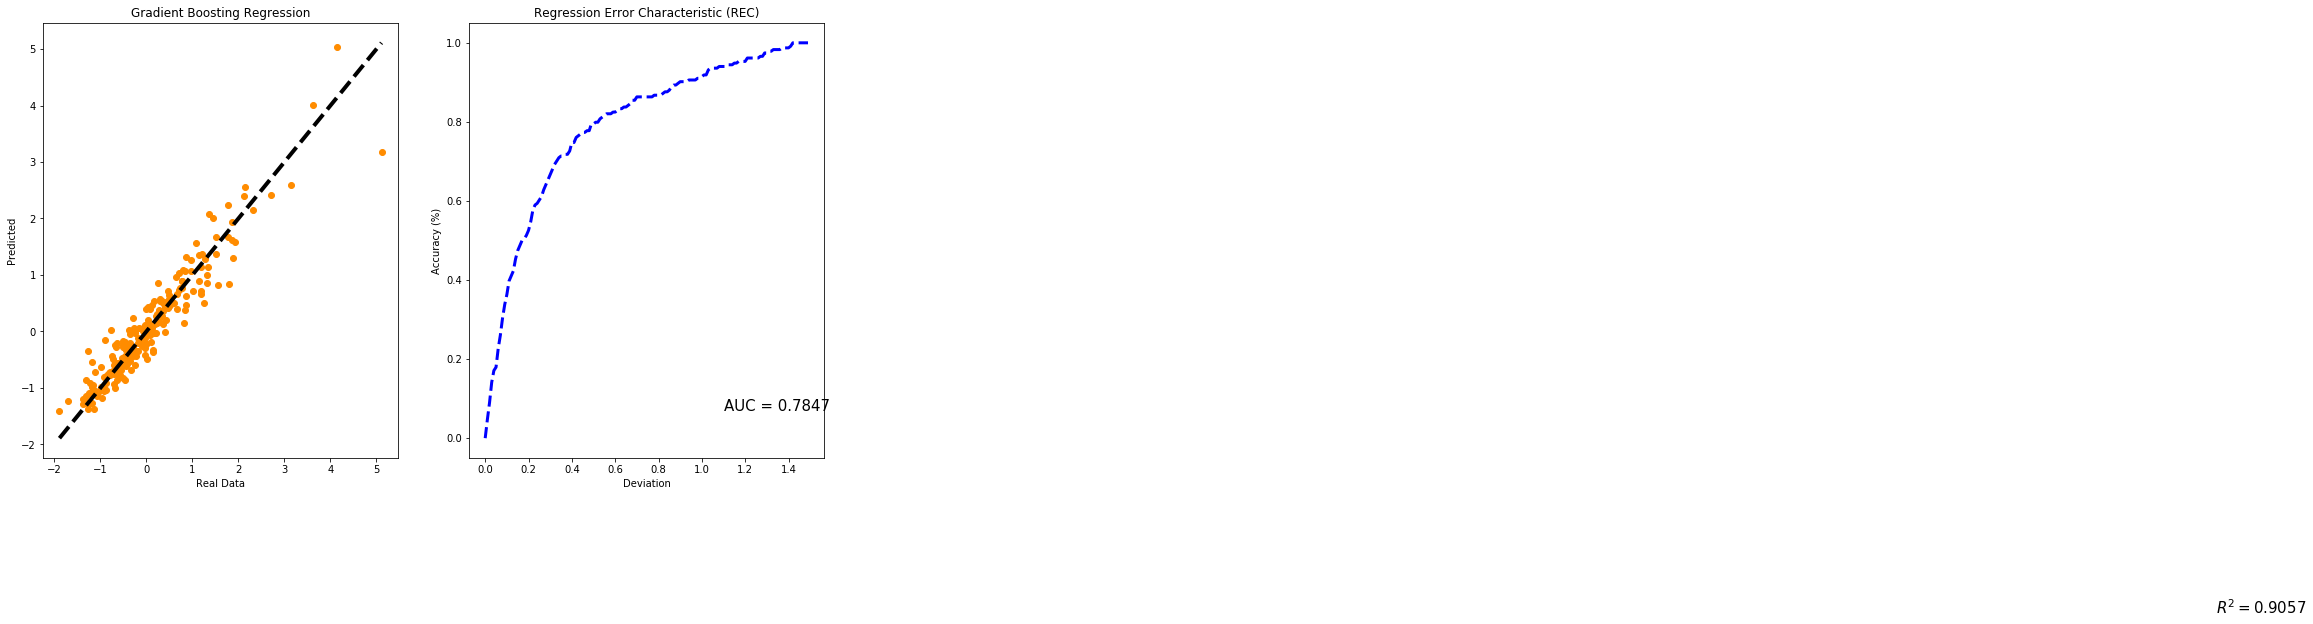

In [287]:
# Visualising the Gradient Boosting Regression Results
# Loading Packages
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.title("Gradient Boosting Regression")
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [288]:
###############################################Testing Set##############################################################
from sklearn.ensemble import GradientBoostingRegressor
estimator = GradientBoostingRegressor()
estimator.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [289]:
# Predicting the Test set results
y_pred_test = estimator.predict(X_test)

In [290]:
##########################################Test Results####################################################################
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred_test))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred_test))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % estimator.score(X_test, y_test))

0.20961943486202106
0.10936614887201696
0.33070553196464214
Variance score: 0.89


In [291]:
# Calculating R^2 of the true and predicted values
RR = r2_score(y_test, y_pred_test)
RR

0.890633851127983

In [292]:
###########################################Ridge Regression#####################################################################
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge.fit(X_train,y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [293]:
y_predval = ridge.predict(X_val)

In [294]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % ridge.score(X_val, y_val))

0.22190304402705893
0.09882432049990099
0.3143633574383328
Variance score: 0.90


In [295]:
# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)
RR

0.901175679500099

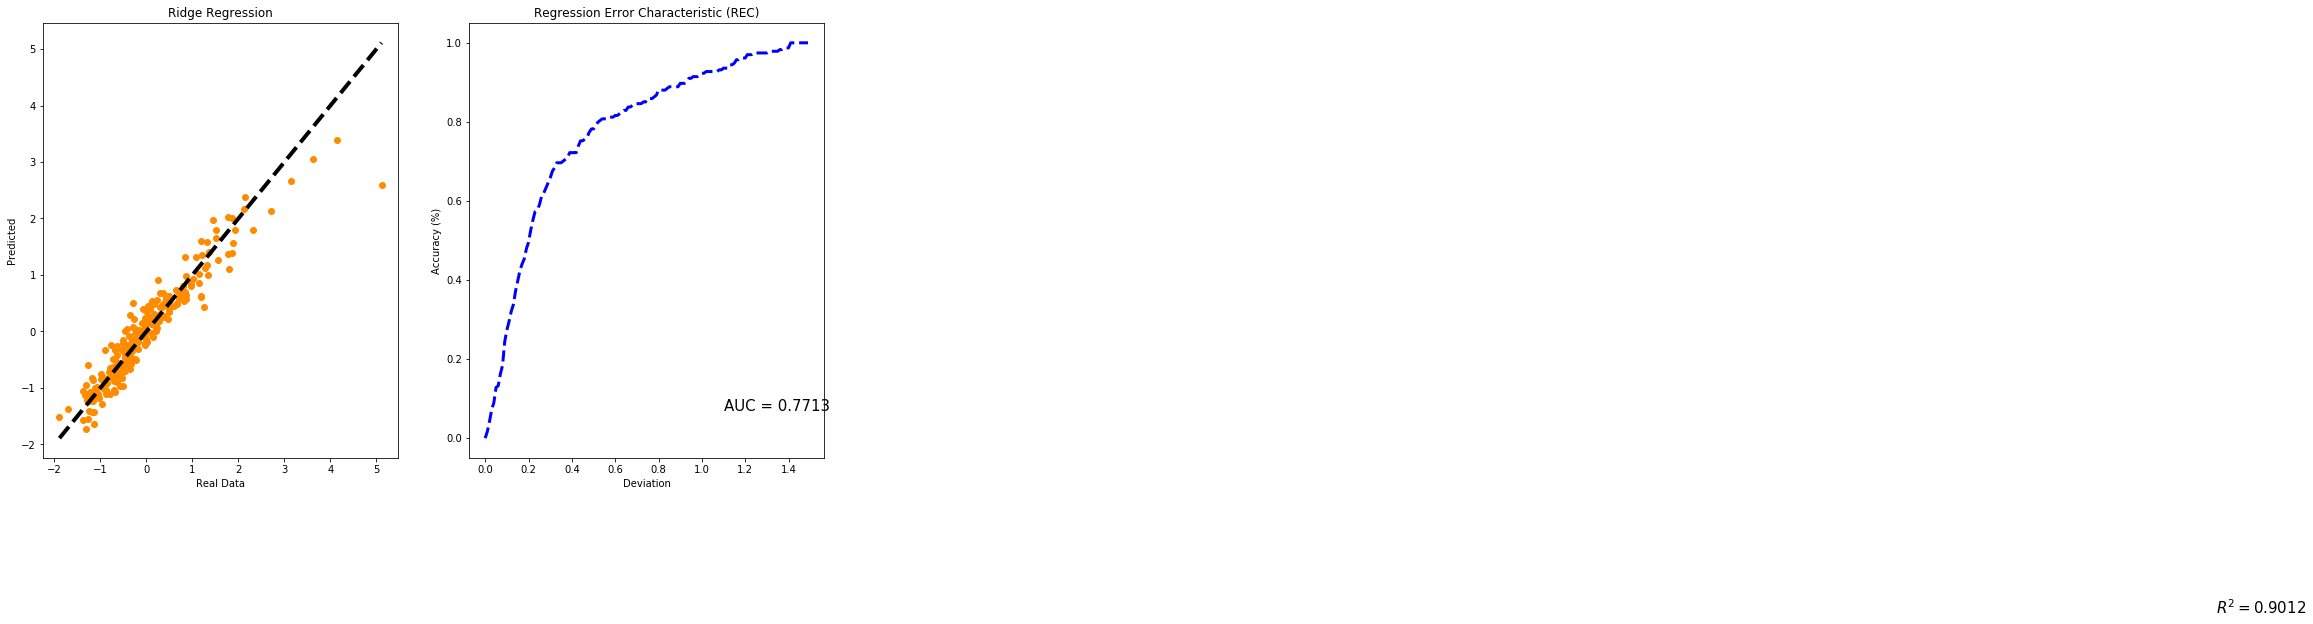

In [296]:
# Visualising the Ridge Regression Results
# Loading Packages
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.title("Ridge Regression")
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [297]:
#######################################Testing Set#############################################################################
####################################Ridge Regression#####################################################################
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge.fit(X_train,y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [298]:
y_pred_test = ridge.predict(X_test)

In [299]:
##########################################Test Results####################################################################
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred_test))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred_test))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % ridge.score(X_test, y_test))

0.264585615999664
0.32201409695477246
0.5674628595377608
Variance score: 0.68


In [300]:
# Calculating R^2 of the true and predicted values
RR = r2_score(y_test, y_pred_test)
RR

0.6779859030452275

In [310]:
#########################################Lasso Regression#####################################################################
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [311]:
y_predval = lasso.predict(X_val)

In [312]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % lasso.score(X_val, y_val))

0.22069877027432155
0.10307636397512093
0.32105507934795385
Variance score: 0.90


In [313]:
# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)
RR

0.8969236360248791

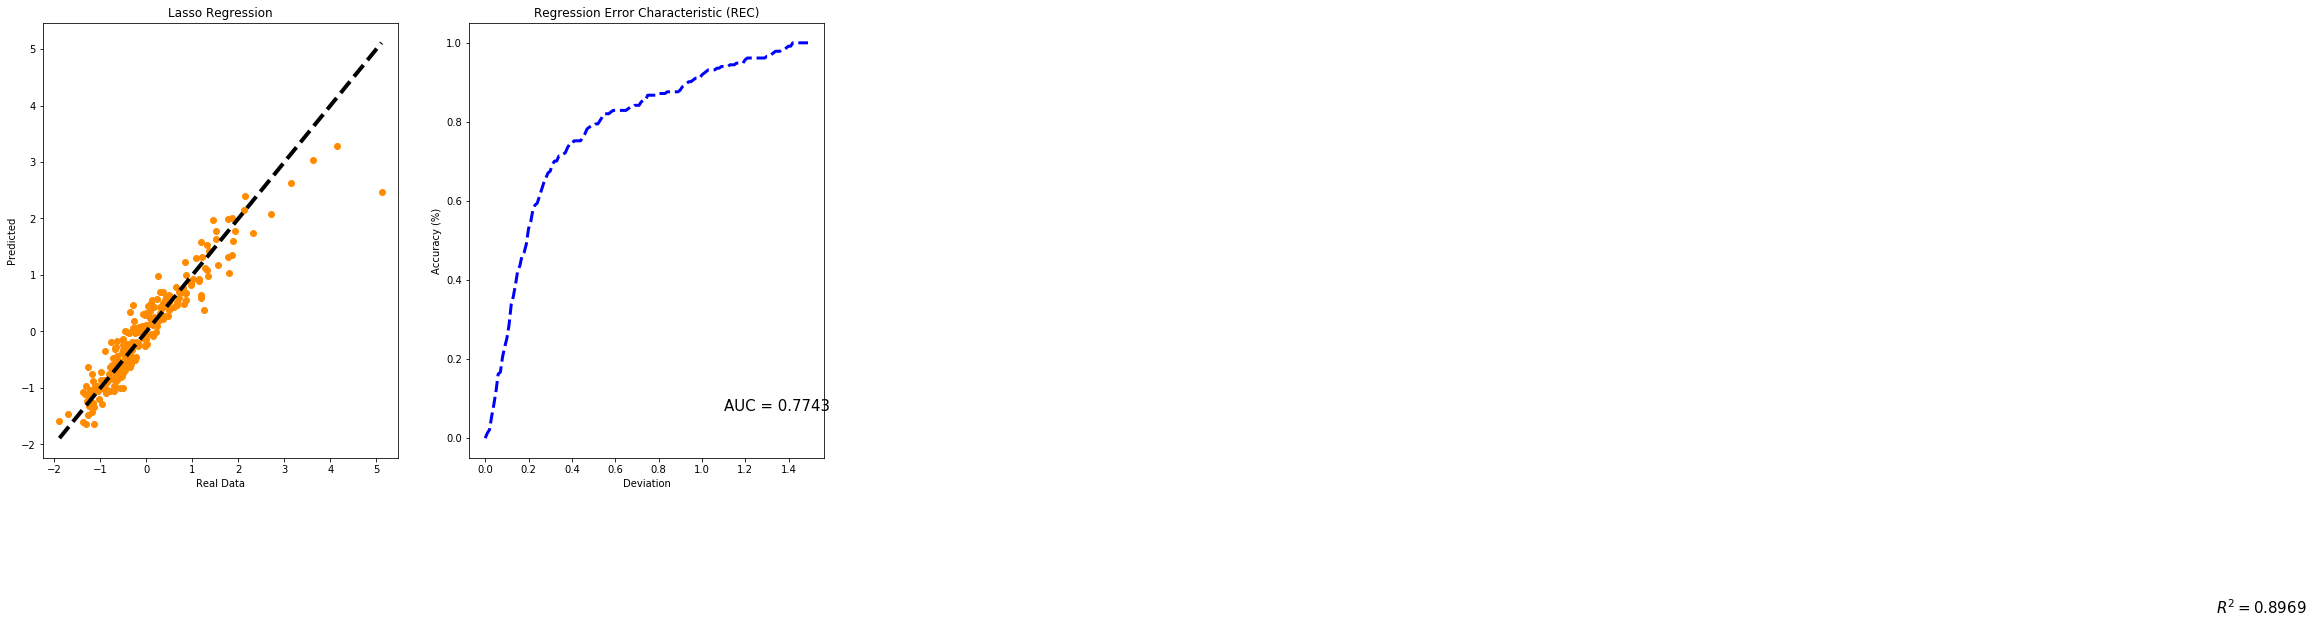

In [314]:
# Visualising the Lasso Regression Results
# Loading Packages
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.title("Lasso Regression")
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [306]:
#######################################Testing Set#############################################################################
#########################################Lasso Regression#####################################################################
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [307]:
y_pred_test = lasso.predict(X_test)

In [308]:
##########################################Test Results####################################################################
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred_test))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred_test))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % lasso.score(X_test, y_test))

0.26147206937499345
0.3225446664377415
0.5679301598240241
Variance score: 0.68


In [309]:
# Calculating R^2 of the true and predicted values
RR = r2_score(y_test, y_pred_test)
RR

0.6774553335622585

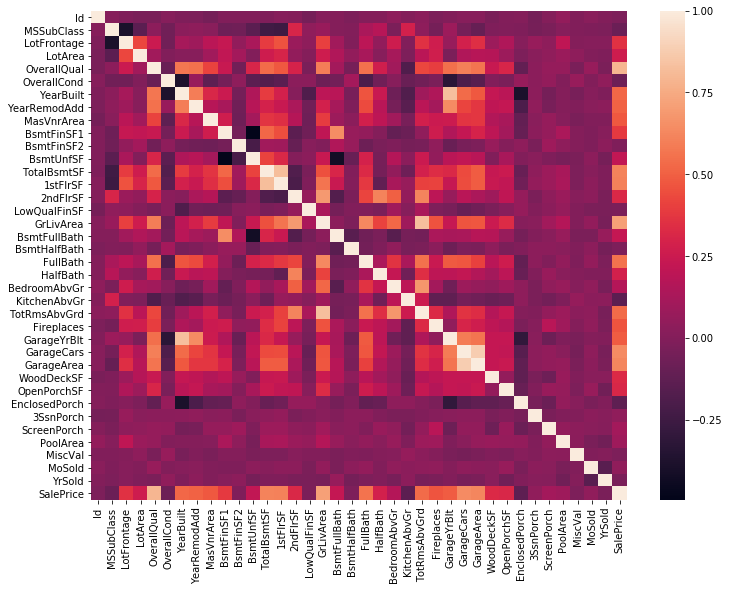

In [316]:
#Heat Map Depicting Correlation between variables
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(dataset.corr(), ax=ax);

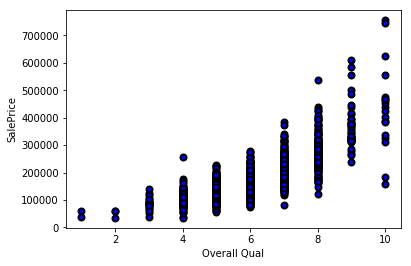

In [323]:
plt.scatter(x=dataset['OverallQual'], y=dataset['SalePrice'], 
            color="blue", edgecolors="#000001", linewidths=2.0);
plt.xlabel("Overall Qual"); plt.ylabel("SalePrice");